In [2]:
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt
from matplotlib import cm
from sparse_model import SparseLayer

from train_sparse_model import load_mnist_data
from train_sparse_model import plot_filters

In [18]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
if device == "cpu":
    batch_size = 64
else:
    batch_size = 4096

train_loader = load_mnist_data(batch_size)
example_data, example_targets = next(iter(train_loader))

idx = 0
num_img = 32
num_filters = 784
imgs = example_data[idx:idx+num_img, 0, :, :].to(device)
sparse_layer = SparseLayer(imgs.shape[1], imgs.shape[2], num_filters)
sparse_layer.to(device)

learning_rate = 1e-3
filter_optimizer = torch.optim.Adam(sparse_layer.parameters(),
                                    lr=learning_rate)

In [19]:
# for _ in range(20):
#     activations = sparse_layer(imgs)
#     loss = sparse_layer.loss(imgs, activations)
for epoch in range(1):
    for local_batch, local_labels in train_loader:
        local_batch = local_batch.to(device)
        local_labels = local_labels.to(device)
        activations = sparse_layer(local_batch[:, 0, :, :])
        loss = sparse_layer.loss(local_batch[:, 0, :, :], activations)
        print('loss={}'.format(loss))

        filter_optimizer.zero_grad()
        loss.backward()
        filter_optimizer.step()
        sparse_layer.normalize_weights()

loss=332.0523376464844
loss=292.95654296875
loss=263.90325927734375
loss=244.70127868652344
loss=231.74411010742188
loss=220.93212890625
loss=213.1378631591797
loss=204.97972106933594
loss=199.4355926513672
loss=193.6648406982422
loss=188.51861572265625
loss=185.35797119140625
loss=180.99485778808594
loss=177.09767150878906
loss=174.2540283203125


SHAPES
torch.Size([32, 28, 28])
(32, 28, 28)


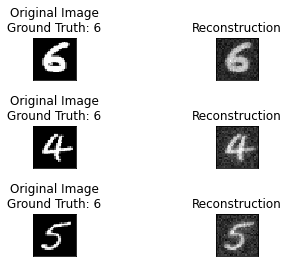

In [20]:
activations = sparse_layer(imgs)
reconstructions = sparse_layer.reconstructions(
    activations).cpu().detach().numpy()

print("SHAPES")
print(imgs.shape)
print(reconstructions.shape)

fig = plt.figure()

img_to_show = 3
for i in range(img_to_show):
    # original
    plt.subplot(img_to_show, 2, i*2 + 1)
    plt.tight_layout()
    plt.imshow(example_data[idx+i, 0, :, :], cmap='gray',
               interpolation='none')
    plt.title("Original Image\nGround Truth: {}".format(
        example_targets[idx]))
    plt.xticks([])
    plt.yticks([])

    # reconstruction
    plt.subplot(img_to_show, 2, i*2 + 2)
    plt.tight_layout()
    plt.imshow(reconstructions[i, :, :], cmap='gray',
               interpolation='none')
    plt.title("Reconstruction")
    plt.xticks([])
    plt.yticks([])

In [17]:
# plot_filters(sparse_layer.filters.cpu().detach())